# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

## <font color="darkorange"> Note teoriche

### Autocorrelazione
In una simulazione Monte Carlo (MC), il **tempo di correlazione** $t_c$ rappresenta il tempo necessario affinché il sistema si evolva da uno stato a un altro sufficientemente diverso. Questo è il tempo oltre il quale le configurazioni del sistema possono essere considerate statisticamente indipendenti. Ci si aspetta infatti che, nel caso di campionamento con algoritmo di Metropolis, configurazioni del sistema "temporalmente" vicine siano simili, cioè fortemente correlate, e quindi non indipendenti. Questo può causare problemi nel calcolo dei valori delle osservabili del sistema, in quanto gli errori statistici sarebbero affetti dalla dipendenza della misure.

Un modo per stimare il tempo di correlazione è valutare la **funzione di autocorrelazione** $\chi$ di un'osservabile del sistema $x(t)$:
$$
\chi(t) = \frac{\langle x(t') x(t'+t) \rangle - \langle x \rangle^2}{\langle x^2 \rangle - \langle x \rangle^2}
= \frac{ \langle x(t') x(t'+t) \rangle - \langle x \rangle^2 }{ \sigma_x^2 }
$$

che ci si aspetta decada esponenzialmente con tempo caratteristico pari al tempo di correlazione:

$$
\chi(t) \approx e^{-t / t_c}
$$

Per avere configurazioni effettivamente indipendenti, si mostra che è necessario che queste siano temporalmente spaziate di più di un tempo di correlazione, generalmente si assume $2t_c$. 
Se una simulazione dura un tempo $t_{\text{max}}$, e si assume di aver aspettato un opportuno tempo di correlazione $t_{\text{eq}}$, allora il numero di misure statisticamente indipendenti che è possibile ottenere è:

$$
n = \frac{t_{\text{max}} - t_{\text{eq}}}{2 t_c}
$$

Nel caso di una catena di Markov, il tempo è discreto (si parla di distanza tra le configurazioni), per cui la funzione autocorrelazione è data da:

$$
\chi(t) = \frac{
\displaystyle \frac{1}{t_{\text{max}} - t} \sum_{t' = 0}^{t_{\text{max}} - t} m(t') m(t' + t)
- \left( \frac{1}{t_{\text{max}} - t} \sum_{t' = 0}^{t_{\text{max}} - t} m(t') \right)
\left( \frac{1}{t_{\text{max}} - t} \sum_{t' = 0}^{t_{\text{max}} - t} m(t' + t) \right)
}{
\displaystyle \frac{1}{t_{\text{max}} - t} \sum_{t' = 0}^{t_{\text{max}} - t} m(t' + t)
}
$$

Se $t \rightarrow t_{max}$ il numero di termini considerati nella sommatoria diminuisce, rendendo il calcolo degli errori statistici che compaiono nella formula piuttosto rumoroso. Di solito non ci si preoccupa di questo poichè dopo alcuni tempi di correlazione $\chi(t)$ si annulla, per cui il contributo dei termini a lunghi tempi risulta trascurabile.

---

### Errori statistici e sistematici
Nelle simulazioni Monte Carlo, le fonti di errore possono essere di due tipologie:
- **Errori statistici** $\rightarrow$ dovuti a fluttuazioni casuali tra le misure fatte da una configurazione all'altra. Si tratta di erorri inerenti, cioè ineliminabili, solo riducibili. Ipotizzando di fare $N$ misure dell'osservabile $x$, che gli errori siano solo di natura statistica e che siano verificate le ipotesi del teorema del limite centrale, allora il miglior modo per stimarne il valore è la deviazione standard della media:
  
$$
\sigma = \sqrt{\frac{1}{N-1} \left( \langle x^2 \rangle - \langle x \rangle^2 \right)}
$$

In generale però il campionamento avviene a tempi minori di $t_c$, per cui le misure saranno statisticamente correlate. Per stimare l'errore si usa $n = \frac{t_{\text{max}} - t_{\text{eq}}}{2 t_c}$ (misure effettivamente indipendenti in $t_{max}$), anzichè il numero effettivo di samples realizzati:

$$
\sigma \approx \sqrt{ \frac{2t_c}{t_{\text{max}}} \left( \langle x^2 \rangle - \langle x \rangle^2 \right) }
$$

- **Errori sistematici** $\rightarrow$ dipendono dalla procedura di simulazione, e sono ineliminabili. Non si manifestano nella fluttuazione delle variabili misurate, e dunque sono difficili da stimare. Nel caso dell'algoritmo di Metropolis, potrebbero derivare da un tempo di equilibrazione troppo breve, oppure dal non aver fatto un numero di passi sufficienti a rendere le misure tra loro indipendenti.

---

### Sparse averaging

In generale, se il calcolo di un'osservabile $G(\mu)$ è molto costoso, rispetto alla generazione di nuove configurazioni, non conviene usare per il calcolo dell'errore tutte le configurazioni generate, essendo queste fortemente correlate (si perderebbe tempo computazionale a valutare $G(\mu)$ a vuoto). Conviene generare molte configurazioni ed usare solo quelle distanziate di almeno $t_c$ o $2t_c$, in modo che ognuna di queste risulti effettivamente indipendente dalle altre. Ciò permette una corretta valutazione degli stimatori statistici, essendo sicuramente soddisfate le ipotesi del teorema del limite centrale. Questo procedimento è noto come **sparse averaging**.
Siccome si sprecano molte delle configurazioni usate (e quindi molto tempo computazionale), è norma usarlo solo se il calcolo di $G(\mu)$ è molto pesante.

---

### Metodo del data blocking

Un modo utile per stimare gli errori in presenza di correlazioni temporali è usare la tecnica del **data blocking**. Si vuole valutare il valore di un osservabile $g$. Allora:
1. si dividono gli $M$ dati in $N$ blocchi di lunghezza $L = M / N$;
2. si calcola la media $\bar{g}_j$ degli $L$ valori in ciascun blocco $j$;
3. si calcola la media globale $\langle \bar{g} \rangle = \frac{1}{N} \sum_{j=1}^N \bar{g}_j$ delle medie di blocco $\bar{g}_i$;
4. si calcola l'errore sulla media globale come deviazione standard della media:

$$
\sigma_{\langle g \rangle} = \sqrt{ \frac{1}{N(N - 1)} \sum_{j=1}^{N} (\bar{g}_j - \langle \bar{g} \rangle)^2 } = \sqrt{ \frac{\langle \bar{g}^2\rangle - \langle \bar{g}\rangle^2}{N-1}} 
$$

dove:

$$
\langle \bar{g}\rangle = \frac{1}{N}\sum_{j=1}^{N}\bar{g}_j
\quad
\langle \bar{g}^2\rangle = \frac{1}{N}\sum_{j=1}^{N}\bar{g}_j^2 
$$

A patto di prendere blocchi di lunghezza sufficiente (le misure singole non sono più correlate), le loro medie sono indipendenti, ed è possibile applicare il teorema del limite centrale. All'aumentare del numero di blocchi si osserva che l'errore si stabilizza ad un valore costante, che corrisponde proprio alla deviazione standard della media.
Se si aumenta ulteriormente $L$, si riduce il numero blocchi su cui fare la media, motivo per cui la questa diventa più rumorosa. Formalmente, la distribuzione delle medie sta cambiando, ma la larghezza rimane invariata (poichè si era partiti da una situazione in cui l'errore si era già stabilizzato), e quindi la stima dell'incertezza non migliora.

---

### Funzione di distribuzione radiale
La **funzione di distribuzione radiale** $g(r)$ è una quantità strutturale dei sistemi a molti corpi che misura quanto è probabile trovare una particella a una distanza $r$ da un'altra, rispetto al caso di un gas ideale alla stessa densità.
$g(r)$ permette di estrarre informazioni sulla struttura microscopica di un sistema, stimando se le particelle tendono a disporsi a distanze specifiche, come si osserva in liquidi e solidi, oppure in maniera randomica, come avviene invece per i gas ideali.
Per trovare la funzione $g(r)$, si definisce la **densità a $n$-particelle**, cioè la probabilità di trovare particelle nelle posizioni $\mathbf{r}_1, \ldots, \mathbf{r}_n$, indipendentemente dalla posizione delle altre $N-n$ particelle:

$$
\rho^{(n)}(\mathbf{r}_1, \ldots, \mathbf{r}_n) = \frac{N!}{(N-n)!} \frac{1}{Z} \int d\mathbf{r}_{n+1} \ldots d\mathbf{r}_N \, e^{-\beta V(\mathbf{r}_1, \ldots, \mathbf{r}_N)}
$$

Questa si ottiene integrando la distribuzione di probabilità configurazionale di tutte le particelle $\frac{1}{Z} e^{-\beta V(\mathbf{r}_1, \ldots, \mathbf{r}_N)}$ sulle possibili configurazioni di tutte le particelle eccetto le $n$ considerate, moltiplicando per un opportuno fattore di normalizzazione $\frac{N!}{(N-n)!}$.
Si ottiene così la probabilità di osservare le $n$ particelle nelle posizioni specificate, tenendo conto delle interazioni di tutto il sistema, ma "ignorando" la posizione esatta delle altre particelle.

A questo punto si definisce:

$$
g^{(n)}_N(\mathbf{r}_1, \ldots, \mathbf{r}_n) = \frac{\rho^{(n)}(\mathbf{r}_1, \ldots, \mathbf{r}_n)}{\prod_{i=1}^{n} \rho^{(1)}(\mathbf{r}_i)}
$$

in modo da confrontare la densità reale a $n$ particelle con quella che ci si aspetterebbe se le particelle fossero indipendenti (prodotto delle probabilità di singola particella):
- se non ci sono interazioni tra particelle (sistema ideale), allora $\rho^{(n)} = \prod \rho^{(1)}$, e quindi $g^{(n)} = 1$;
- se $g^{(n)} > 1$, indica **correlazione positiva**: è più probabile trovare particelle vicine di quanto si osserverebbe in un sistema ideale;
- se $g^{(n)} < 1$, c’è una **repulsione o anticorrelazione**: è meno probabile trovare le particelle vicine di quanto si osserverebbe in un sistema ideale.

Nel caso di sistemi omogenei, la funzione $g^{(2)}(\mathbf{r}_1, \mathbf{r}_2)=g(r)$ dipenderà solo dalla distanza $r = |\mathbf{r}_1 - \mathbf{r}_2|$. In questo caso, $g(r)$ rappresenta la probabilità relativa di trovare una particella a distanza $r$ da un’altra, rispetto a un gas ideale alla stessa densità.

---

### Correzioni di coda
Come spiegato nell'Esercitazione 4, se si ha a che fare con potenziali a breve range, come il potenziale di Lennard-Jones, è lecito trascurare nel calcolo delle grandezze descritte da interazioni di coppia le interazioni che avvengono a distanza superiore ad una certa distanza di cutoff $r_{cut}$. Tuttavia, se si volesse includere il contributo legato alla parte mancante del potenziale (quella più a lungo range), è possibile stimare dei fattori correttivi, le cosiddette **correzioni di coda**, utilizzando la definizione di valore medio di funzione di coppia e ipotizzando $g(r) \sim 1$. Tale approssimazione è lecita poichè a grandi distanze è possibile trascurare la correlazione tra particelle. Considerando le correzioni di coda all'energia potenziale e alla pressione nel caso di un potenziale di interazione di Lennard-Jones, si ottiene:
- per l'energia potenziale: $U_{\text{tail}}^{\text{LJ}} = 8\pi \rho \varepsilon \left( \frac{\sigma^{12}}{9 r_c^9} - \frac{\sigma^6}{3 r_c^3} \right)$

- per la pressione (calcolata con il teorema del viriale): $P_{\text{tail}}^{\text{LJ}} = 32\pi \rho^2 \varepsilon \left( \frac{\sigma^{12}}{9 r_c^9} - \frac{\sigma^6}{6 r_c^3} \right)$

---

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### *Esercizio 07.1 - Soluzione proposta*
Per la risoluzione di questo esercizio sono state implementate nel codice NSL_SIMULATOR le correzioni di coda al calcolo dell'energia potenziale e della pressione, in accordo con quanto esposto nella parte teorica. Poichè il codice lavora in unità ridotte, rispetto alle formule precedenti, sono stati posti:
$$
\sigma = 1 \quad \epsilon = 1
$$

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out **instantaneous** values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo $(N,V,T)$ and Molecular Dynamics $(N,V,E)$ simulations</span> of $M=5\times 10^5$ MC steps or MD time steps (where, for MC, the Metropolis acceptance ratio should be fixed approximately to 50% by changing the value of $dt$ that, in the MC case, represent the amplitude of the step in each direction) in the following thermodynamic conditions:
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r^\star_c = 2.5$, for MD $dt^\star=0.001$)

Equilibration is needed both with MC and with MD. With MD, you will observe that starting from a perfect crystalline configuration the temperature, $T$, will not conserve its value. Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$.
<span style="color:red">Perform your MC and MD simulations by re-starting after such equilibration time.</span>

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### *Esercizio 07.2 - Soluzione proposta*
Per la risoluzione di questo esercizio è stata innanzitutto eseguita una fase di equilibrazione del sistema, sia nel caso della dinamica molecolare ($N, V, E$), sia nel caso della simulazione Monte Carlo ($N, V, T$).

**Dinamica molecolare**:\
L’equilibrazione è stata condotta in maniera analoga a quanto visto nell’Esercitazione 4. Il sistema viene inizializzato in una configurazione cristallina FCC, così da distribuire uniformemente le particelle all’interno dell'intero box di simulazione. Le velocità iniziali necessarie per avviare l’algoritmo di Verlet sono assegnate estraendo ciascuna componente ($v_x$, $v_y$, $v_z$) da una distribuzione gaussiana, centrata in zero e con varianza pari alla temperatura del sistema. Questa scelta è giustificata dal fatto che, all'equilibrio, le velocità delle particelle seguono la distribuzione di Maxwell-Boltzmann, che è appunto una gaussiana con media nulla e varianza proporzionale alla temperatura. In questo modo, si assegna alle velocità iniziali un valore coerente con la temperatura di lavoro, riducendo il tempo necessario a raggiungere l’equilibrio termodinamico.

L’equilibrazione viene avviata con temperatura iniziale leggermente superiore, pari a $T^* = 1.97$. Il sistema viene fatto evolvere per $M = 10^4$ passi, suddivisi in altrettanti blocchi da singolo step, registrando la temperatura istantanea a ogni passo. L’equilibrio termodinamico è raggiunto quando il valore della temperatura si stabilizza intorno a $T^* = 1.1$. Si osserva che il sistema risulta ben stabilizzato a circa 5000 passi.

A questo punto, la simulazione viene riavviata con 5000 passi, al fine di salvare le ultime due configurazioni spaziali, che saranno utilizzate come input della simulazione richiesta dal problema. Viene poi eseguita una simulazione preliminare con temperatura di input pari all'ultimo valore istantaneo ottenuto in equilibrazione ($T^* = 1.15271$), con un blocco unico di 2500 passi, al fine di ottenere una stima della temperatura media all’equilibrio. Tale valore risulta essere pari a $T^* = 1.10114$.

**Simulazione Monte Carlo**:\
Anche in questo caso, il sistema viene inizializzato nella configurazione FCC. Vengono eseguiti $M = 10^4$ passi di simulazione con l'algoritmo di Metropolis, suddivisi altrettanti blocchi da singolo step. Si segue l’andamento istantaneo dell’energia potenziale, e si osserva che il sistema si stabilizza dopo circa 5000 passi.

Per garantire che la simulazione parta da una configurazione equilibrata, vengono quindi eseguiti 5000 passi “a vuoto” prima di iniziare la raccolta dei dati.

Di seguito si riportano i grafici relativi all’andamento della temperatura e dell’energia potenziale durante la fase di equilibrazione, rispettivamente per dinamica molecolare e simulazione Monte Carlo.

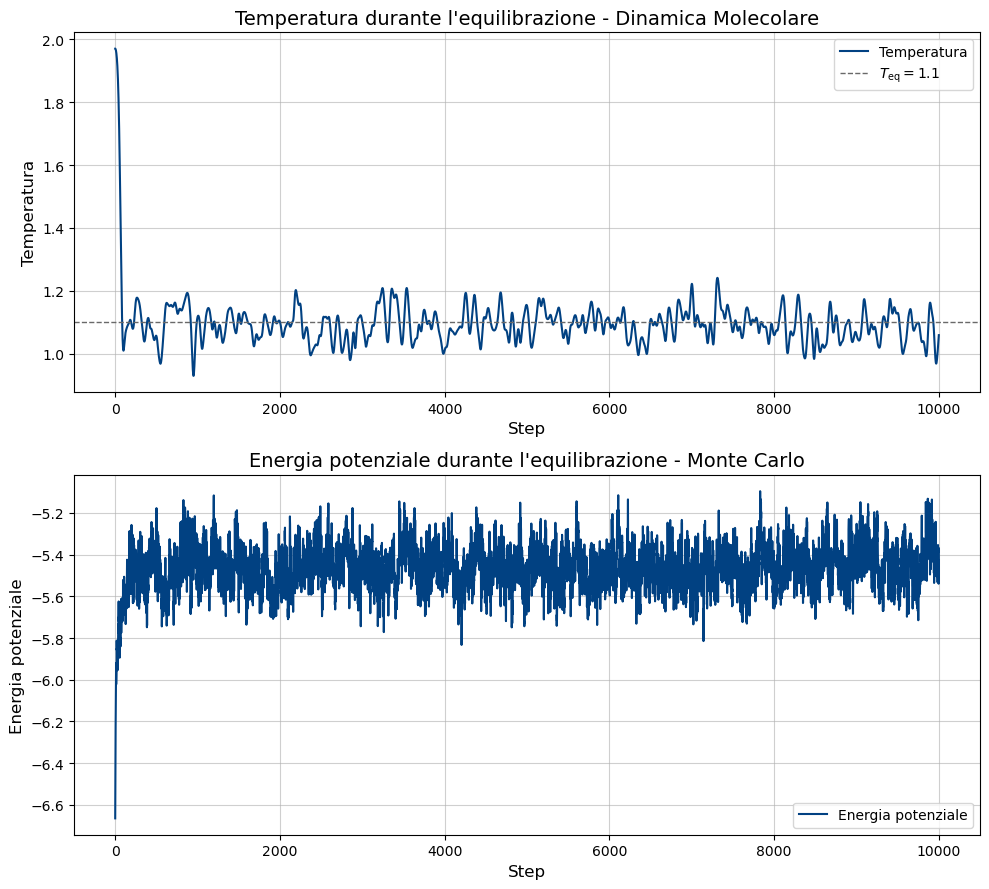

In [27]:
import numpy as np
import matplotlib.pyplot as plt

file_temp_md = 'OUTPUT_PLOT/EQUILIBRATION_MD/temperature.dat'

data_temp_md = np.loadtxt(file_temp_md)

x_temp_md, y_temp_md = data_temp_md[:, 0][:10000], data_temp_md[:, 1][:10000]

file_energy_mc = 'OUTPUT_PLOT/EQUILIBRATION_MC/potential_energy.dat'

data_energy_mc = np.loadtxt(file_energy_mc)

x_energy_mc, y_energy_mc = data_energy_mc[:, 0][:10000], data_energy_mc[:, 1][:10000]

fig, axes = plt.subplots(2, 1, figsize=(10, 9), sharex=False)

axes[0].plot(x_temp_md, y_temp_md, color='xkcd:darkish blue', label = "Temperatura")
axes[0].set_title("Temperatura durante l'equilibrazione - Dinamica Molecolare", fontsize=14)
axes[0].axhline(y=1.1, color='dimgray', linewidth=1, linestyle='--', label=r"$T_{\rm eq} = 1.1$")
axes[0].set_xlabel("Step", fontsize=12)
axes[0].set_ylabel("Temperatura", fontsize=12)
axes[0].grid(True, alpha = 0.6)
axes[0].legend()

axes[1].plot(x_energy_mc, y_energy_mc, color='xkcd:darkish blue', label = "Energia potenziale")
axes[1].set_title("Energia potenziale durante l'equilibrazione - Monte Carlo", fontsize=14)
axes[1].set_xlabel("Step", fontsize=12)
axes[1].set_ylabel("Energia potenziale", fontsize=12)
axes[1].grid(True, alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()


Partendo dalla configurazione equilibrata, il sistema eseguono $M=5 \cdot 10^5$ mosse di simulazione, suddivisi in altrettanti blocchi da singolo step, salvando per ognuno i valori istantanei dell'energia potenziale. É stato poi utilizzato uno script in Python per vedere come variano:
- l'autocorrelazione dei dati ottenuti al variare del lag (distanza temporale tra due misure);
- l'errore statistico in funzione della lunghezza dei blocchi.

Nel caso della simulazione di dinamica molecolare la funzione di autocorrelazione decresce piuttosto rapidamente, assestandosi a valore nullo da circa 1000 steps. L'errore statistico invece cresce fino a oscillare, da circa 2500 steps, ad un valore circa costante. É possibile usare una lunghezza di blocco pari a 2000 passi, così da eliminare la correlazione senza sprecare campioni.

Nel caso della simulazione Monte Carlo, la funzione di autocorrelazione si annulla molto rapidamente, e risulta trascurabile già dopo un lag pari a 300. L'errore invece si assesta ad un valore costante già ad una lunghezza di blocco di 1000 steps. Si può quindi considerare una lunghezza di blocco pari 1000 steps, al fine di ottenere una buona stima dell'errore.

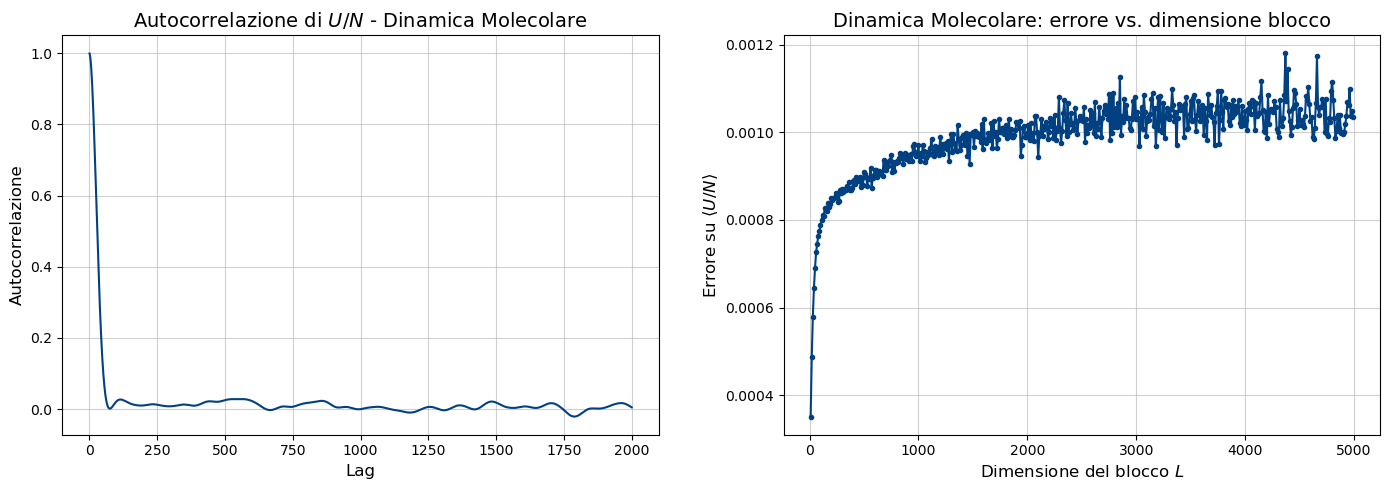

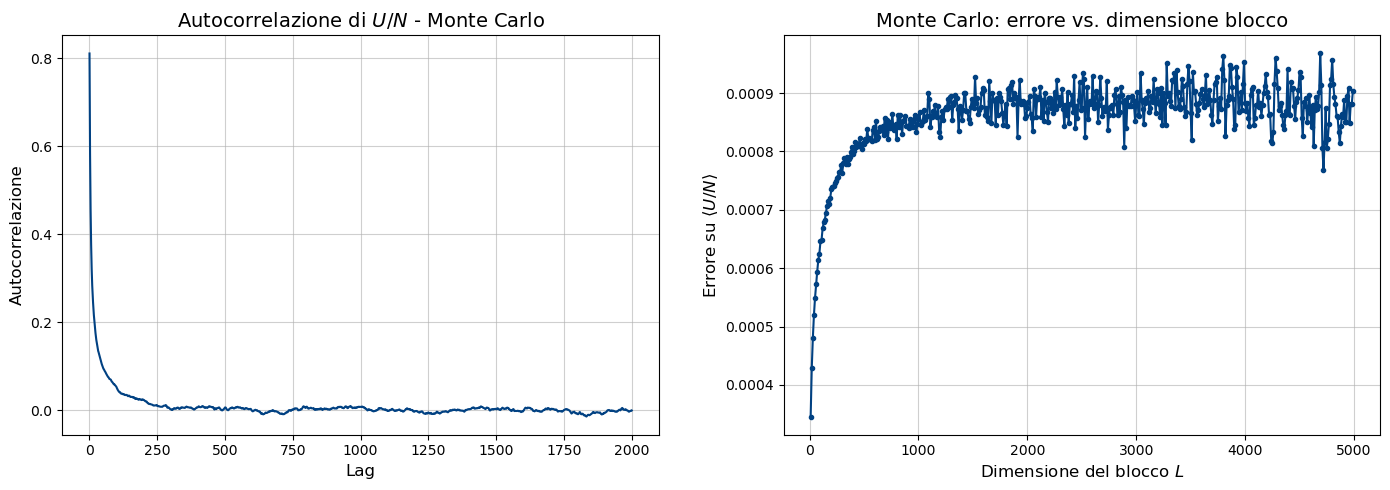

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

n_throws = 500000
max_lag = 2000
sizes = [10 * i for i in range(1, 500)] 
def autocorr(data, t):
    N = len(data)
    mean = np.mean(data)
    var = np.var(data)
    if var == 0:
        return 0
    sum_prod = np.sum((data[:N - t] - mean) * (data[t:] - mean))
    return sum_prod / ((N - t) * var)

def error(AV, AV2, n):
    if n == 0:
        return 0
    return math.sqrt((AV2[n] - AV[n]**2) / n)

def blockerror(data, N, L):
    ave = np.array([np.mean(data[i*L:(i+1)*L]) for i in range(N)])
    av2 = ave**2
    sum_prog = np.cumsum(ave) / np.arange(1, N+1)
    sum2_prog = np.cumsum(av2) / np.arange(1, N+1)
    return error(sum_prog, sum2_prog, N-1)

file_path_md = "OUTPUT_PLOT/CORRELATION_MD/potential_energy.dat"
data_md = np.loadtxt(file_path_md, usecols=1, max_rows=n_throws, skiprows=1)

auto_md = [autocorr(data_md, t) for t in range(1, max_lag)]

valid_sizes_md = [L for L in sizes if n_throws // L >= 2]
errors_md = [blockerror(data_md, n_throws // L, L) for L in valid_sizes_md]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, max_lag), auto_md, color='xkcd:darkish blue')
axes[0].set_title("Autocorrelazione di $U/N$ - Dinamica Molecolare", fontsize=14)
axes[0].set_xlabel("Lag", fontsize=12)
axes[0].set_ylabel("Autocorrelazione", fontsize=12)
axes[0].grid(True, alpha=0.6)

axes[1].plot(valid_sizes_md, errors_md, marker='.', color='xkcd:darkish blue')
axes[1].set_title("Dinamica Molecolare: errore vs. dimensione blocco", fontsize=14)
axes[1].set_xlabel("Dimensione del blocco $L$", fontsize=12)
axes[1].set_ylabel("Errore su $\\langle U/N \\rangle$", fontsize=12)
axes[1].grid(True, alpha=0.6)

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()

file_path_mc = "OUTPUT_PLOT/CORRELATION_MC/potential_energy.dat"
data_mc = np.loadtxt(file_path_mc, usecols=1, max_rows=n_throws, skiprows=1)

auto_mc = [autocorr(data_mc, t) for t in range(1, max_lag)]

valid_sizes_mc = [L for L in sizes if n_throws // L >= 2]
errors_mc = [blockerror(data_mc, n_throws // L, L) for L in valid_sizes_mc]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, max_lag), auto_mc, color='xkcd:darkish blue')
axes[0].set_title("Autocorrelazione di $U/N$ - Monte Carlo", fontsize=14)
axes[0].set_xlabel("Lag", fontsize=12)
axes[0].set_ylabel("Autocorrelazione",  fontsize=12)
axes[0].grid(True, alpha=0.6)

axes[1].plot(valid_sizes_mc, errors_mc, marker='.', color='xkcd:darkish blue')
axes[1].set_title("Monte Carlo: errore vs. dimensione blocco", fontsize=14)
axes[1].set_xlabel("Dimensione del blocco $L$", fontsize=12)
axes[1].set_ylabel("Errore su $\\langle U/N \\rangle$", fontsize=12)
axes[1].grid(True, alpha=0.6)

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()


### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### *Esercizio 07.3 - Soluzione proposta*
Nel codice `NSL_SIMULATOR`, nel metodo `measure` della classe `System`, è stato implementato il metodo per il calcolo della distribuzione radiale $g(r)$. L’approccio adottato è analogo a quello utilizzato per costruire la distribuzione delle velocità nella dinamica molecolare (Esercitazione 4).

Viene allocato nel contenitore di misure un numero di posizioni pari al numero di bin dell'istogramma, $N_{\text{bins}}$, specificato nel file di input `properties.dat`. Ogni elemento dell'array, inizialmente posto a zero, rappresenta un intervallo di distanza radiale.
Il range spaziale coperto dalla distribuzione viene definito fino a metà della dimensione minima del box di simulazione. Questa scelta è legata all’utilizzo del metodo delle immagini minime: considerare distanze maggiori porterebbe a contare più volte la stessa coppia di particelle, violando l’assunzione che ogni coppia venga considerata una sola volta.

Durante la simulazione (dopo l’equilibrazione, in condizioni di equilibrio termico), per ogni coppia distinta di particelle si calcola la distanza relativa, applicando le condizioni al contorno periodiche, e si aggiorna il bin corrispondente. Il contatore viene incrementato di 2, in quanto ogni coppia contribuisce simmetricamente a $g(r)$.

Una volta raccolti tutti i dati, ciascun bin viene normalizzato tramite il fattore:

$$
\mathcal{N}(r_i) = \rho \cdot N_{\text{part}} \cdot \Delta V_i
$$

dove$\rho$ è la densità del sistema, $N_{\text{part}}$ è il numero totale di particelle e $\Delta V_i$ è il volume della corona sferica associata al bin $i$, centrata in $r_i$, dato da:

$$
\Delta V_i = \frac{4}{3} \pi \left( r_{i+1}^3 - r_i^3 \right)
$$

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT and MD NVE simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for these quantities with those obtained via MD NVE simulations in similar thermodynamic conditions.</span>

### *Esercizio 07.4 - Soluzione proposta*
A partire dalle configurazioni equilibrate ottenute al termine dell'Esercizio 7.2, sia nel caso di dinamica molecolare, sia nel caso di simulazione Monte Carlo, è stata avviata una nuova simulazione, per un totale di $M = 2 \cdot 10^5$ passi, suddivisi in $N = 100$ blocchi da $L = M/N = 2000$ steps ciascuno, finalizzata al calcolo di energia potenziale per particella $U/N$, pressione $P$ e distribuzione radiale $g(r)$. I dati sono stati elaborati utilizzando il metodo del data blocking. Di seguito si riportano gli andamenti ottenuti in funzione del numero di blocchi considerato (per $g(r)$ si riportano le distribuzioni relative alla media cumulativa di 100 blocchi).

Si noti che la lunghezza dei blocchi risulta sufficiente a garantire che i valori all'interno di ciascuno di essi siano scorrelati.

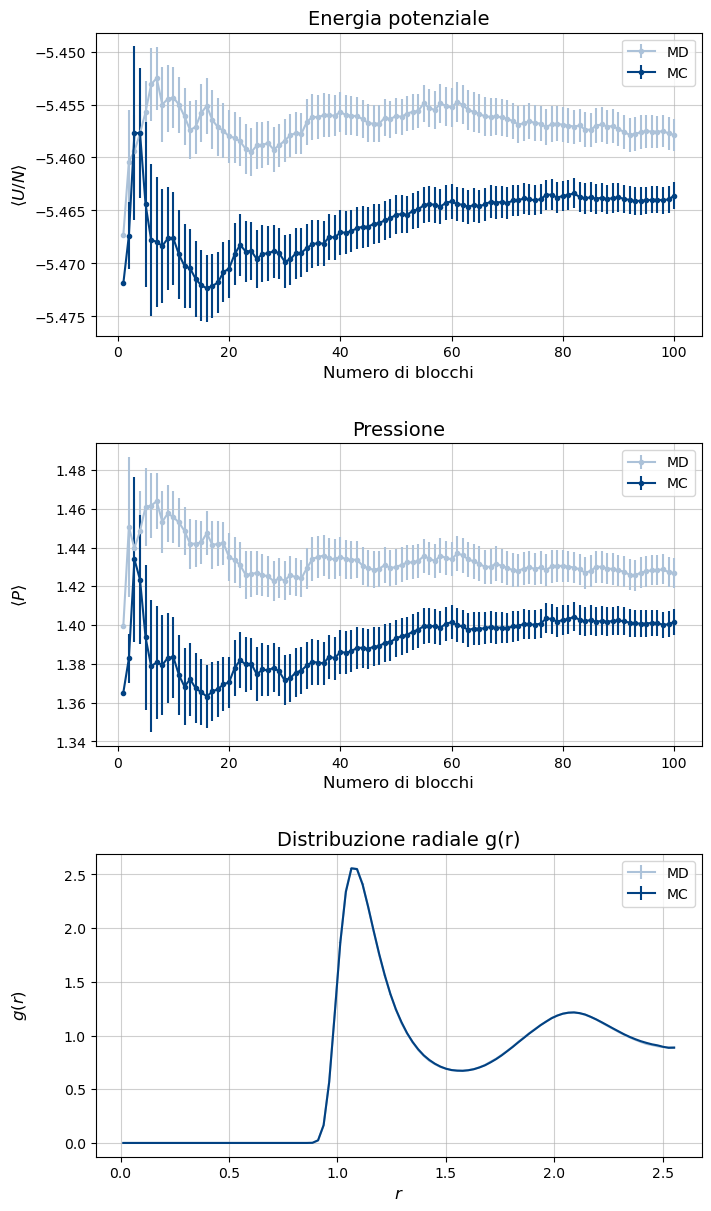

In [34]:
import numpy as np
import matplotlib.pyplot as plt

name = ["OUTPUT_PLOT/SIM_MD/potential_energy.dat", "OUTPUT_PLOT/SIM_MD/pressure.dat"]
name2 = ["OUTPUT_PLOT/SIM_MC/potential_energy.dat", "OUTPUT_PLOT/SIM_MC/pressure.dat"]
title = ["Energia potenziale", "Pressione", "Distribuzione radiale g(r)"]

y_label = [r'$\langle U/N \rangle$', r'$\langle P \rangle$', r'$g(r)$']
x_label_blocks = "Numero di blocchi"

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,12), layout='constrained')
fig.set_constrained_layout_pads(hspace=0.1)

for i in range(2):
    data_md = np.loadtxt(name[i])
    data_mc = np.loadtxt(name2[i])

    axes[i].errorbar(data_md[:,0], data_md[:,2], yerr=data_md[:,3], marker='.', label='MD', color='xkcd:cloudy blue')
    axes[i].errorbar(data_mc[:,0], data_mc[:,2], yerr=data_mc[:,3], marker='.', label='MC', color='xkcd:darkish blue')

    axes[i].set_title(title[i], fontsize=14)
    axes[i].set_xlabel(x_label_blocks, fontsize=12)
    axes[i].set_ylabel(y_label[i], fontsize=12)
    axes[i].grid(True, alpha=0.6)
    axes[i].legend()

data_gdirmd = np.loadtxt("OUTPUT_PLOT/SIM_MD/gofr.dat")[-100:]
data_gdirmc = np.loadtxt("OUTPUT_PLOT/SIM_MC/gofr.dat")[-100:]

axes[2].errorbar(data_gdirmd[:,0], data_gdirmd[:,2], yerr=data_gdirmd[:,3], label='MD', color='xkcd:cloudy blue')
axes[2].errorbar(data_gdirmc[:,0], data_gdirmc[:,2], yerr=data_gdirmc[:,3], label='MC', color='xkcd:darkish blue')

axes[2].set_title(title[2], fontsize=14)
axes[2].set_xlabel(r'$r$', fontsize=12)
axes[2].set_ylabel(y_label[2], fontsize=12)
axes[2].grid(True, alpha=0.6)
axes[2].legend()

fig.align_labels()

plt.show()


Si ossera che gli andamenti ottenuti risultano confrontabili nel caso di dinamica molecolare e simulazione Monte Carlo, come ci aspetteremmo. Infatti, a parità di condizioni termodinamiche, la distribuzione statistica di Maxwell-Boltzmann campionata all'equilibrio è la medesima. In particolare, gli andamenti di $g(r)$ ottenuti per dinamica molecolare e Monte Carlo risultano perfettamente sovrapponibili.

Anche la forma di $g(r)$ è compatibile con le aspettative: nulla per $r \rightarrow 0$ (core repulsivo del potenziale di Lennard-Jones), picchi corrispondenti alle distanza intermolecolari caratteristiche e successivo assestamento attorno al valore unitario: non si risente più della correlazione e le particelle si distribuiranno come nel caso di un gas ideale. 

> NOTA: la pressione viene stimata a partire dal teorema del viriale, in accordo con la formula seguente:
$$
P = \rho k_B T - \frac{1}{3V}\,\Big\langle \sum_{i<j} r_{ij}\,\frac{dV(r)}{dr}\Big|_{r=r_{ij}} \Big\rangle
$$
mentre l'energia potenziale è calcolata a partire dalla forma del potenziale di interazione di Lennard-Jones.
La temperatura, nel caso della dinamica molecolare NVE, è valutata a partire dall'energia cinetica, cioè dalla velocità delle particelle, mentre nel caso della simulazione Monte Carlo NVT coincide con la temperatura di input passata al sistema. Di tale differenza si è tenuto conto nella scrittura del codice delle due simulazioni.